In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pickle
import sys

sys.path.insert(1, '../../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 13})

In [ ]:
import os
folder = '../figs'
if not os.path.exists(folder):
    os.makedirs(folder)

## Parameters

In [3]:
dataset = 'pr_school'

In [4]:
weighted = True

In [5]:
mu = 0.1

In [6]:
if dataset == 'hospital':    
    beta_betaT_range = [(0.6,0.8),
                        (0.2,0.8),
                        (0.3,5),
                        (0.4,7.5),
                        (0.15,5),
                        (0.3,10),
                        (0.1,10),
                        (0.06,10),
                        (0.05,15),
                        (0.05,19)]
elif dataset == 'workplace': 
    beta_betaT_range = [(0.5,7),
                        (0.4,7.3),
                        (0.3,6.5),
                        (0.25,6.5),
                        (0.25,7),
                        (0.2,7),
                        (0.2,7.3)]
elif dataset == 'conference':
    beta_betaT_range = [(1,12),
                        (0.9,12),
                        (0.8,12),
                        (0.7,12),
                        (0.6,12),
                        (0.5,12),
                        (0.4,12)]

if dataset == 'pr_school':
    beta_betaT_range = [(0.07,7),
                        #(0.08,7),
                        (0.1,7),
                        #(0.11,6),
                        (0.1,5),
                        (0.2,7),
                        (0.15,5),
                        #(0.14,5),
                        (0.2,5),
                        #(0.17,4),
                        (0.2,3),
                        #(0.23,2),
                        (0.2,1),
                        #(0.26,1)
                        ]

In [8]:
CL_list = []
CT_list = []
C_list = []
for (beta,betaT) in beta_betaT_range:
    filename = "results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    CL = load_C_mean(filename)
    CL_list.append(CL)
    filename = "results/inf_treeSIR/CT_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    CT = load_C_mean(filename)
    CT_list.append(CT)
    C_list.append(CL+CT)

In [9]:
np.sum(CL),np.sum(CT)

(172.48356526777843, 26.516434732221587)

../figs/CL_CT_mean_weighted_pr_school_mu_0.10.pdf


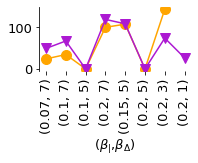

In [10]:
fig,ax = plt.subplots(1,1,figsize=(2.95,2.5286))
plt.plot(np.sum(CL_list,axis=1),'o-',label='$|C_1|$',color='orange',markersize=10)
plt.plot(np.sum(CT_list,axis=1),'v-',label='$|C_2|$',color='#ac19d2',markersize=10)
#plt.plot(np.sum(CL_list,axis=1)/np.sum(CT_list,axis=1),'o',label='CL/CT')
plt.xlabel(r'($\beta_|$,$\beta_{\Delta}$)')
#plt.ylabel('$|C|$')
plt.xticks([i for i in range(len(beta_betaT_range))],beta_betaT_range,rotation='vertical')
if dataset== 'pr_school':
    plt.ylim([-5,150])
elif dataset == 'hospital':
    plt.ylim([-5,45])
elif dataset == 'conference':
    plt.ylim([10,120])
elif dataset == 'workplace':
    plt.ylim([-5,100])
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

figname = '../figs/CL_CT_mean_weighted_%s_mu_%.2f.pdf'%(dataset,mu)
print(figname)
plt.savefig(figname)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 0, '($\\beta_|$,$\\beta_{\\Delta}$)')

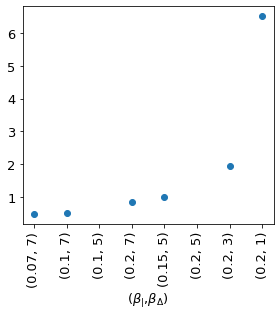

In [11]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4))
plt.plot(np.sum(CL_list,axis=1)/np.sum(CT_list,axis=1),'o')
plt.xticks([i for i in range(len(beta_betaT_range))],beta_betaT_range,rotation='vertical')
plt.xlabel(r'($\beta_|$,$\beta_{\Delta}$)')


In [12]:
S = np.full((len(beta_betaT_range),len(beta_betaT_range)),0.0)
for i in range(len(beta_betaT_range)-1):
    for j in range(i+1,len(beta_betaT_range)):
        S[i,j] = cos_sim(C_list[i],C_list[j])

../../utils.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))


In [13]:
figname = '../figs/cos_sim_%s_mu_%.2f'%(dataset,mu)

0.1583053531635836 0.45656264451003553
../figs/cos_sim_pr_school_mu_0.10.pdf


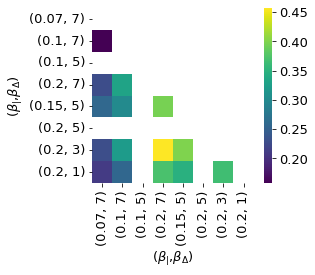

In [14]:
plot_sim(S, mu, beta_betaT_range, ax_label=r'($\beta_|$,$\beta_{\Delta}$)', save=True, figname=figname)

0.8708926301573268 0.9930384288788436
../figs/cos_sim_pr_school_mu_0.10_colorscale.pdf


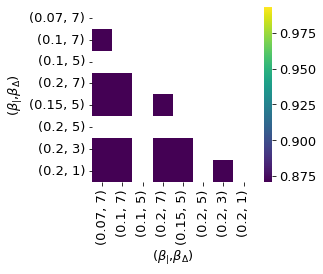

In [15]:
plot_sim(S, mu, beta_betaT_range, ax_label=r'($\beta_|$,$\beta_{\Delta}$)', save=True, figname=figname)